<a href="https://colab.research.google.com/github/merrymira/UPASS_ML_WEEK3/blob/main/UPASS_ML_WEEK3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Exercise

We are going to use the USA_Housing dataset for this regression problem.

Reference: https://www.kaggle.com/code/faressayah/practical-introduction-to-10-regression-algorithm/notebook

Data: https://raw.githubusercontent.com/merrymira/UPASS_ML_WEEK3/main/USA_Housing.csv

We will build an univariate linear regression model that will predict the house price in USA.

The steps are:

1. Load Explore and Prepare Dataset
2. Assess Baseline
3. Train LinearRegression Model
4. Train Lasso Model with all Features
5. Train Ridge Model with all Features
6. Train Elastinet Model with all Features

##1. Load Explore and Prepare Dataset

**[1.1]** Import the pandas and numpy packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**[1.2]** Create a variable called file_url containing the link to the CSV file

In [2]:
file_url = "https://raw.githubusercontent.com/merrymira/UPASS_ML_WEEK3/main/USA_Housing.csv"

**[1.3]** Load the data into a DataFrame called df

In [3]:
df = pd.read_csv(file_url)

**[1.4]** Display the first 5 rows of df

In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


**[1.5]** Display the summary (info) of df

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
#Using dataframe df: check null values
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [7]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

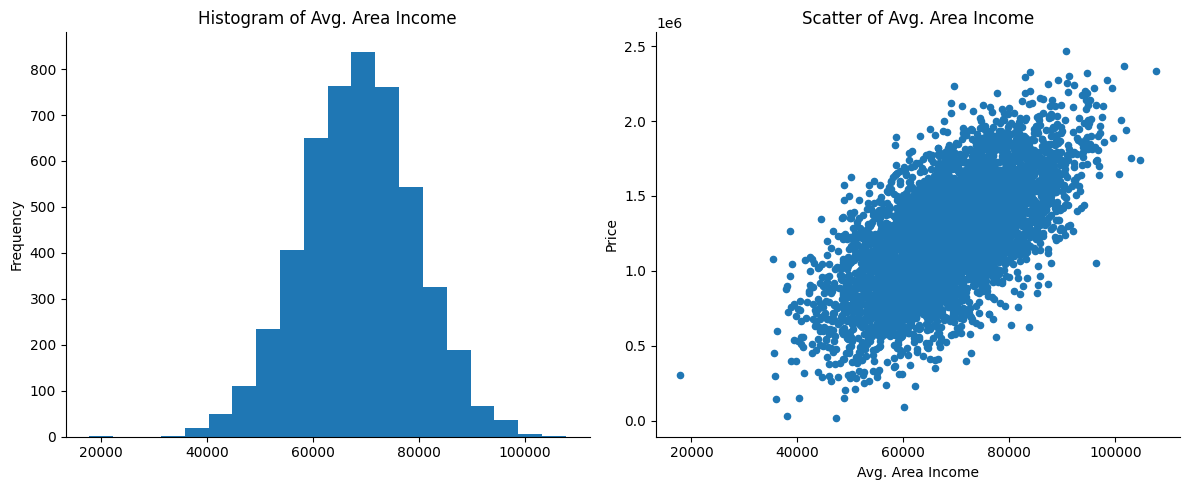

In [8]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram on the first subplot
df['Avg. Area Income'].plot(kind='hist', bins=20, ax=axes[0], title='Histogram of Avg. Area Income')
axes[0].spines[['top', 'right']].set_visible(False)

# Plot scatter plot on the second subplot
df.plot(x='Avg. Area Income', y='Price', kind='scatter', ax=axes[1], title='Scatter of Avg. Area Income')
axes[1].spines[['top', 'right']].set_visible(False)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [9]:
# Try ploting the distribution of Avg. Area House Age

In [10]:
# Avg. Area Number of Rooms

In [11]:
# Avg. Area Number of Bedrooms

In [12]:
#  Try ploting the distribution of Area Population

Prepare data training set (X) and target (y) for traning the model

In [13]:
y = df['Price']
X1 = df.loc[:, ~df.columns.isin(['Price', 'Address'])]

In [14]:
X1

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


#2. Assess Baseline

**[2.1]** Calculate the mean of the target variable (Price)

In [15]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [16]:
# Placeholder for student's code

**[2.2]** Create a numpy array called y_base filled with this value

In [17]:
# Placeholder for student's code

**[2.3]** Import the MSE and MAE from sklearn and calculate the RMSE and MAE between the target variable and the average value

In [18]:
# Placeholder for student's code

In [19]:
# Placeholder for student's code

#3. Train LinearRegression Model


**[3.1]** Import the LinearRegression model from sklearn.linear_model

In [20]:
# Placeholder for student's code
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

**[3.2]** Create a LinearRegression object called lr and fit (X, y)

In [21]:
# Placeholder for student's code
lr.fit(X1,y)

LinearRegression()

**[3.3]** Print the intercept and coefficient of the lr model

In [22]:
# Placeholder for student's code
print(lr.intercept_)
print(lr.coef_)

-2637299.033328584
[2.15780494e+01 1.65637027e+05 1.20659949e+05 1.65113905e+03
 1.52007439e+01]


**[3.4]** Calculate the RMSE and MAE between the target variable and the predictions

In [23]:
y_preds_lr = lr.predict(X1)

In [24]:
# Placeholder for student's code
print(mse(y, y_preds_lr, squared=False))
print(mae(y, y_preds_lr))

101092.70158252279
81359.27022837057


In [25]:
# Placeholder for student's code

# 3B Adding Zip Code categorical column to training dataset

In [26]:
X2 = X1.copy()

In [27]:
def extract_zip(address):
  import re

  # Define a regular expression pattern to match ZIP code
  zip_code_pattern = r'.. (\d{5})'

  # Search for the ZIP code in the address
  return re.findall(zip_code_pattern, address)

In [28]:
df['Zip Code'] = df['Address'].apply(lambda x: extract_zip(x))

In [29]:
from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()
X2['Zip Code'] = gle.fit_transform(df['Zip Code'].astype(str).values)

In [30]:
X2.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Zip Code
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1715
1,79248.642455,6.002900,6.730821,3.09,40173.072174,2321
2,61287.067179,5.865890,8.512727,5.13,36882.159400,292
3,63345.240046,7.188236,5.586729,3.26,34310.242831,2125
4,59982.197226,5.040555,7.839388,4.23,26354.109472,441


In [44]:
lr.fit(X2, y)
y_preds_lr_X2 = lr.predict(X2)

**Calculate the RMSE and MAE between the target variable and the predictions**

In [45]:
print(mse(y, y_preds_lr_X2, squared=False))
print(mae(y, y_preds_lr_X2))

101073.0030082884
81356.94721294698


#4. Train Lasso Model with all Features


**[4.1]** Import the Lasso model from sklearn.linear_model

In [31]:
# Placeholder for student's code

**[4.2]** Create a Lasso object called lr and fit (X, y)

In [32]:
# Placeholder for student's code

**[4.3]** Calculate the RMSE and MAE between the target variable and the predictions

In [33]:
# Placeholder for student's code

In [34]:
# Placeholder for student's code

#5. Train Ridge Model with all Features


**[5.1]** Import the Ridge model from sklearn.linear_model

In [35]:
# Placeholder for student's code

**[5.2]** Create a Ridge object called lr and fit (X, y)

In [36]:
# Placeholder for student's code

**[5.3]** Calculate the RMSE and MAE between the target variable and the predictions

In [37]:
# Placeholder for student's code

In [38]:
# Placeholder for student's code

#6. Train ElasticNet Model with all Features


**[5.1]** Import the ElasticNet model from sklearn.linear_model

In [39]:
# Placeholder for student's code

**[5.2]** Create a ElasticNet object called lr and fit (X, y)

In [40]:
# Placeholder for student's code

**[5.3]** Calculate the RMSE and MAE between the target variable and the predictions

In [41]:
# Placeholder for student's code

In [42]:
# Placeholder for student's code

#Create a comparison chart

In [43]:
import altair as alt
import pandas as pd

# Assuming you have imported Altair and defined y, y_preds, y_preds_ls, y_preds_rd, y_preds_en

# Sample fraction (adjust as needed)
sample_fraction = 0.01  # Change this to the desired fraction

# Sample dataframes
y_sampled = pd.DataFrame({'target': y, 'preds': y})
y_preds_sampled = pd.DataFrame({'target': y, 'preds': y_preds}).sample(frac=sample_fraction)
y_preds_ls_sampled = pd.DataFrame({'target': y, 'preds': y_preds_ls}).sample(frac=sample_fraction)
y_preds_rd_sampled = pd.DataFrame({'target': y, 'preds': y_preds_rd}).sample(frac=sample_fraction)
y_preds_en_sampled = pd.DataFrame({'target': y, 'preds': y_preds_en}).sample(frac=sample_fraction)

# Scatter plot for perfect prediction (green points)
perfect = alt.Chart(y_sampled).mark_line(color='green').encode(
    x='target',
    y='preds'
)

# Scatter plot for predicted values
lr_chart = alt.Chart(y_preds_sampled).mark_line().encode(
    x='target',
    y='preds'
)

# Scatter plot for predicted values (Least Squares)
ls_chart = alt.Chart(y_preds_ls_sampled).mark_line(color='red').encode(
    x='target',
    y='preds'
)

# Scatter plot for predicted values (Ridge Regression)
rd_chart = alt.Chart(y_preds_rd_sampled).mark_line(color='orange').encode(
    x='target',
    y='preds'
)

# Scatter plot for predicted values (Elastic Net)
en_chart = alt.Chart(y_preds_en_sampled).mark_line(color='grey').encode(
    x='target',
    y='preds'
)

# Display the charts
perfect + lr_chart + ls_chart + rd_chart + en_chart


NameError: name 'y_preds' is not defined